## MAT 321 - PS3

You can (and probably should) discuss assignments with other students, the TAs and me, but you must write and understand any solutions/code that you submit. You can consult any resource you want for this homework, but you should cite sources you used.

Disclaimer: this homework has a lot of text but most of it is background. There is also a lot of code, but most of it is provided for you. Each function you have to complete is indicated by

###ADD YOUR CODE HERE



## Q1 Matrix equations


A one-term matrix equation is of the form:
$$BXA^T = F $$
where $B \in \mathbb{R}^{m \times m}$, $A \in \mathbb{R}^{n \times n}$, $F \in \mathbb{R}^{m \times n}$ are known matrices, and we seek $X\in \mathbb{R}^{m \times n}$.
The map $L(X) = BXA^T$ is linear:

 $$L(\alpha X +  Y) = B(\alpha X + Y)A^T = \alpha B X A^T + BYA^T = \alpha L(X) + L(Y)$$


Thus, one can represent it using a matrix. That matrix is found using the *Kronecker* product of A and B, denoted $A \otimes B$, and the vectorized version of $X$, $\text{vec}(X)$ achieved by stacking the columns of $X$:

$$
X = \begin{bmatrix}
x_{1,1} & x_{1,2} & \dots  & x_{1,n}\\
x_{2,1} & x_{2,2} & \dots  & x_{2,n}\\
\vdots &\vdots & \dots  & \vdots \\
x_{m,1} & x_{2,2} & \dots  & x_{m,n}\\
\end{bmatrix} , \qquad \text{vec}(X) 
= \begin{bmatrix} x_{1,1} \\ x_{2,1}\\
\vdots \\
x_{m,1}\\
x_{1,2}\\
\vdots \\
x_{m,n}  
 \end{bmatrix}
$$

The Kronecker product $A \otimes B \in \mathbb{R}^{mn \times mn}$ is defined as the block matrix:

$$
\mathbf{A}\otimes\mathbf{B} = \begin{bmatrix}
  a_{11} \mathbf{B} & \cdots & a_{1n}\mathbf{B} \\
             \vdots & \ddots &           \vdots \\
  a_{n1} \mathbf{B} & \cdots & a_{nn} \mathbf{B}
\end{bmatrix}
$$

More explicitly:

$$
\mathbf{A}\otimes\mathbf{B} = \begin{bmatrix}
   a_{11} b_{11} & a_{11} b_{12} & \cdots & a_{11} b_{1m} &
                   \cdots & \cdots & a_{1n} b_{11} & a_{1n} b_{12} & \cdots & a_{1n} b_{1m} \\
   a_{11} b_{21} & a_{11} b_{22} & \cdots & a_{11} b_{2m} &
                   \cdots & \cdots & a_{1n} b_{21} & a_{1n} b_{22} & \cdots & a_{1n} b_{2m} \\
   \vdots & \vdots & \ddots & \vdots & & & \vdots & \vdots & \ddots & \vdots \\
   a_{11} b_{m1} & a_{11} b_{m2} & \cdots & a_{11} b_{mm} &
                   \cdots & \cdots & a_{1n} b_{m1} & a_{1n} b_{m2} & \cdots & a_{1n} b_
                   {mm} \\
   \vdots & \vdots & & \vdots & \ddots & & \vdots & \vdots & & \vdots \\
   \vdots & \vdots & & \vdots & & \ddots & \vdots & \vdots & & \vdots \\
   a_{n1} b_{11} & a_{n1} b_{12} & \cdots & a_{n1} b_{1m} &
                   \cdots & \cdots & a_{nn} b_{11} & a_{nn} b_{12} & \cdots & a_{nn} b_{1m} \\
   a_{n1} b_{21} & a_{n1} b_{22} & \cdots & a_{n1} b_{2m} &
                   \cdots & \cdots & a_{nn} b_{21} & a_{nn} b_{22} & \cdots & a_{nn} b_{2m} \\
   \vdots & \vdots & \ddots & \vdots & & & \vdots & \vdots & \ddots & \vdots \\
   a_{n1} b_{p1} & a_{n1} b_{m2} & \cdots & a_{n1} b_{mm} &
                   \cdots & \cdots & a_{nn} b_{m1} & a_{nn} b_{m2} & \cdots & a_{nn} b_{mm}
\end{bmatrix}
$$

The matrix $ C = A \otimes B$ has size $mn \times mn $. In numpy, it can be computed in numpy by `np.kron(A,B)`.


Using this notation, we can rewrite the matrix linear system $BXA^T = F$ into a standard linear system involving a vector of size $nm$.

$$ BXA^T = F \Leftrightarrow (A \otimes B) \text{vec}(X) =  \text{vec}(F)$$

### Q1.1 Not-Kronecker solve  

Write an $O(n^3)$ solver for a one term matrix equations. Assume A and B are $ n \times n$ and invertible.
You may use `np.linalg.solve(C,D)` which solves the system $CX = D$. When given a matrix $D$ as right-hand side, `np.linalg.solve(C,D)` does the following algorithm: perform LU of factorization of $C$, then solve each column of $Cx_i = d_i$ by backsubstition on each column of $D$.


In [ ]:
import numpy as np
def one_term_matrix_equation_solver(A, B, F):
    ## ADD YOUR CODE HERE
    return np.zeros_like(F)

## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.

n = 10
A = np.random.randn(n,n)
X = np.random.randn(n,n)
B = np.random.randn(n,n)
F = B @ X @ A.T

Xsolve = one_term_matrix_equation_solver(A, B, F)
# Should be close to machine epsilon ~1e-13 is fine
print('error: ', np.linalg.norm(Xsolve - X )/np.linalg.norm(X))

### Q 1.2 Kronecker solve
Suppose we want to solve 

$$B_1 X A_1^T + B_2 X A_2^T + \dots B_k X A_k^T = F $$

Write a solver to solve this sytem. You can assume every matrix is $n \times n$. What is its complexity (in terms of $n$) ?
You might want to use the implementation of the $\text{vec}(X):\mathbb{R}^{n\times n} \rightarrow \mathbb{R}^{n^2}$ function, and its inverse $\text{unvec}(x): \mathbb{R}^{n^2}  \rightarrow \mathbb{R}^{n\times n} $ provided below.


### Answer: 1.2 write the complexity here

In [ ]:
import numpy as np

def kronecker_solver(Bs, As, F):
    ## ADD YOUR CODE HERE
    return np.zeros_like(F)

## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.

## the vec(X) function implemented in python.
def vec(X):
    # Numpy is row-ordered, so we need to transpose before we flatten.
    return X.T.reshape(-1)

## Inverse of vec function.
def unvec(x):
    n = np.sqrt(x.size).astype(int)
    return x.reshape(n,n).T


n = 10
k = 5
X = np.random.randn(n,n)
As = np.random.randn(k,n,n) # k (nxn) matrices
Bs = np.random.randn(k, n,n)
F = np.zeros((n,n))
for i in range(k):
    F += Bs[i] @ X @ As[i].T

Xsolve = kronecker_solver(Bs, As, F)

# Should be close to machine epsilon ~1e-13 is fine
print('error: ', np.linalg.norm(Xsolve - X )/np.linalg.norm(X))


## Q1.3 Fast Kronecker matvec
Let $C \in \mathbb{R}^{n \times n}$ be a Kronecker matrix such that $C = A \otimes B$ where $A,B\in \mathbb{R}^{\sqrt{n}\times \sqrt{n}}$. 
Write an $O(n^{3/2})$ algorithm to compute $Cx$.

In [ ]:
import numpy as np

def fast_kron_matvec(A,B, x):
    ## ADD YOUR CODE HERE
    return np.zeros_like(x)



## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.

def naive_kron_matvec(A,B,x):
    # A O(n^2) algorithm
    return np.kron(A,B) @ x

n_root = 30
n = n_root**2
A = np.random.randn(n_root,n_root) 
B = np.random.randn(n_root,n_root)
x = np.random.randn(n)

b = naive_kron_matvec(A,B,x)
b_fast = fast_kron_matvec(A,B, x)

# Should be close to machine epsilon ~1e-13 is fine
print('error: ', np.linalg.norm(b - b_fast )/np.linalg.norm(b))


# Q2: Cholesky Decomposition of Toeplitz matrices

Recall that the Cholesky decomposition of an SPD matrix A can be computed in two steps iteratively:
* (Step 1) Compute a row of R: $$R_{k,k:} \leftarrow A_{k,k:} / \sqrt{A_{k,k}}$$
* (Step 2) Update Schur complement of $A_{k:,k:}$: $$A_{k+1:,k+1:} \leftarrow A_{k+1:,k+1:} - R_{k,k:}^T R_{k,k:} $$
 
While inverting circulant matrices fast is easy, inverting Toeplitz matrices fast is far from it, and it is an active area of research.
In this exercise, we will build a Cholesky factorization in $\mathcal{O}(n^2)$ of symmetric positive definite Toeplitz matrices, bringing down the cost from $\mathcal{O}(n^3)$. 
Symmetric Toeplitz matrices are of the form:

$$ 
T = \qquad\begin{bmatrix}
t_0 & t_{1} & t_{2} & t_{3} & t_{4} \\
t_1 & t_0 & t_{1} & t_{2} & t_{3} \\
t_2 & t_1 & t_0 & t_{1} & t_{2} \\
t_3 & t_2 & t_1 & t_0 & t_{1}  \\
t_4 & t_3 & t_2 & t_1 & t_0 
\end{bmatrix}
$$

A crucial property used to create fast Toeplitz solvers is its *displacement structure*, which we now introduce.

Let $Z_n$ be the $n \times n$ "shift-down-by-one" matrix:

$$
Z_n = \begin{bmatrix}
 0 &  &  &  & &  &    \\
1 & 0 &  &  &  &  &   \\
  & 1& 0 &  &  &  &   \\
  &  &1 &0  &  &  &   \\
  &  &  &1 &0  &  &   \\
  &  &  &  &\ddots  &\ddots  &   \\
    &  &  &  &  & 1 & 0 \\
\end{bmatrix}
$$

Note that $Z_n$ is not a permutation matrix (its first row is only 0's). We say an SPD matrix $A$ is *quasi-Toeplitz* if it satisfies the following condition:

$$A - Z_n A Z_n^T = G J G^T $$

where $G \in \mathbb{R}^{n \times 2}$, and $J =  \begin{bmatrix} 1 &  0 \\ 0 & -1 \end{bmatrix}$. Such an equation is called a *displacement rank equation*, and we say quasi-Toeplitz matrices have *displacement rank 2* because the matrix $GJG^T$ is rank2. The intuition is that displacing the rows just slightly creates a rank $2$ matrix $G J G^T$. The matrix $G$ is called a *generator* of the quasi-Toeplitz matrix A.

Generators are not unique, but we identify a special one: we say $\hat{G}$ is a *proper generator* if it is a generator, and it has a 0 on the (1,2) entry:

$$
\hat{G} = \begin{bmatrix} 
\hat{g}_{11} & 0 \\
\hat{g}_{21} & \hat{g}_{22} \\
\hat{g}_{23} & \hat{g}_{33} \\
\vdots & \vdots \\
 \end{bmatrix} .
$$

1. Prove that SPD Toeplitz matrices are quasi-Toeplitz. That is, find a generator $G$ of an SPD Toeplitz matrix.

2. Show that if $\hat{G}$ is a proper generator of a quasi-toeplitz matrix $A$, then the first column of $\hat{G}$ is the first row of $A$ divided by the square root of the (1,1) entry of A, that is: $ {\hat{G}_{:,1}}^T = A_{1,:} / \sqrt{a_{11}}$. Hence, if we have access to a proper generator, (Step 1) of Cholesky is trivial.


3. Suppose $G$ is a generator of quasi-Toeplitz SPD matrix $A$. Let 
$$Q = \frac{1}{\sqrt{1 - \gamma^2}} \begin{bmatrix} 1 & -\gamma \\ - \gamma & 1\end{bmatrix}$$
 with $\gamma = \frac{g_{12}}{g_{11}}$ where $g_{i,j}$ is entry $i,j$ of $G$. Show that $GQ$ is a proper generator of A. (Note that $a_{11} = g_{11}^2 - g_{12}^2$, and $A$ is SPD thus $|g_{11}| > |g_{12}| \implies |\gamma | < 1$.)


4. Finally, we want to show that the Schur complement of a quasi-Toeplitz is also quasi-Toeplitz. Let 
$$A = \begin{bmatrix} a_{11} & a_{1,2}^T\\
a_{1,2} & A_{2,2} \end{bmatrix}, \qquad c = \begin{bmatrix} a_{11} \\ a_{1,2} \end{bmatrix} \qquad  S = A_{2,2} -  a_{1,2} a_{1,2}^T \frac{1}{a_{11}}$$
i.e., $S \in \mathbb{R}^{(n-1) \times (n-1)} $ is the Schur complement of A, $c$ is the first column of $A$; and let $\hat{G}$ be a proper generator of $A$ **(note the proper is important here! We want to use part 2)**.


First, show that the matrix: 
$$
A - c c^T \frac{1}{a_{11}} = \begin{bmatrix} 0 & 0 \\ 0 & S \end{bmatrix} \in \mathbb{R}^{n \times n}
$$
is quasi-Toeplitz. Then, use this fact to conclude that $S$ is also quasi-Toeplitz and that $G_2$:

$$G_2 = \begin{bmatrix} \hat{g}_{1,1} & \hat{g}_{2,2}\\
\hat{g}_{2,1} & \hat{g}_{3,2}\\
\vdots & \vdots \\
\hat{g}_{n-1,1} & \hat{g}_{n,2}\\
\end{bmatrix} \in \mathbb{R}^{(n-1) \times 2 }$$

is a generator for $S$. (Here, $\hat{g}_{i,j} $ denotes entry $i,j$ of $\hat{G}$, the proper generator of $A$). That is, we want to show:
$$S - Z_{n-1}S Z_{n-1}^T = G_2J G_2^T   $$


5. Using these identities, implement a $O(n^2)$ Cholesky factorization of a Toeplitz symmetric positive definite below.


## Q2.1-Q2.4 Add your answers to parts 1-4 here

In [ ]:
import scipy.linalg
import numpy as np
import time
import matplotlib.pyplot as plt

def fast_toeplitz_cholesky(c):
    n = c.size
    R = np.zeros((n,n))
    ## ADD YOUR CODE HERE

    return R

## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.


# A helper function you may use to compute the Q matrix from part3.
def get_Q(gamma):
    if np.abs(gamma) >= 1:
        print('Something went wrong! |gamma| > 1')
    Q  = np.array( [[1, -gamma], [ -gamma, 1]] ) / ( np.sqrt( 1- gamma**2))
    return Q


# Form a random Toeplitz SPD matrix using its circulant embedding.
n = 10
fx = np.random.randn(10)**2
x = np.fft.ifft(fx)
C = scipy.linalg.circulant(x)
T = C[:n//2, :n//2].real
s,_ = np.linalg.eig(T)
print('T symmetric?: ', np.allclose(T, T.T) )
print('T positive definite?: ', np.all(s > 0) )

c = T[:,0]

R = fast_toeplitz_cholesky(c)
print('Backward error: ', np.linalg.norm(R.T @ R - T) / np.linalg.norm(T) )


# Running with smallish ns first to make sure the complexity is right. Running this whole cell takes ~1s on my machine. If it takes a lot longer, your solution might be O(n^3)
ns = 2**(np.arange(4,10))

# Once you have debugged, uncomment this line. Careful: if your algorithm is O(n^3), it will take very long.
# It takes ~ 4s on my machine to run with the O(n^2) alg.
# ns = 2**(np.arange(4,13))
times = []

for n in ns:
    fx = np.random.randn(2*n)**2
    x = np.fft.ifft(fx)
    C = scipy.linalg.circulant(x)
    T = C[:n, :n].real
    c = T[:,0]

    start_time = time.time()
    for _ in range(10):
        R = fast_toeplitz_cholesky(c)
    end_time = time.time()
    times.append(end_time - start_time)

    print(f"Time taken for n={n}: {end_time - start_time:.4f} seconds")

# On my machine, the plot looks even faster than O(n^2), but blows up after ~ 8000.
# The scaling is not always observed for smallish problem, where the real bottleneck is moving data to and from the CPU. 
# Plotting the results
plt.figure(figsize=(10, 6))
plt.loglog(ns, times, marker='o', label='Measured time')

plt.loglog(ns, [times[2] * (n / ns[2])**2 for n in ns], linestyle='--', label='O(n^2) reference')
plt.loglog(ns, [times[2] * (n / ns[2])**3 for n in ns], linestyle='--', label='O(n^3) reference')

plt.xlabel('Matrix size (n)')
plt.ylabel('Time (seconds)')
plt.title('Scaling of Toeplitz Cholesky Decomposition')
plt.legend()
plt.grid(True)
plt.show()


# Q3: 2D averaging and deblurring

Cryogenic electron-micrscopy (cryo-EM) is a technique that allows imaging of proteins at atomic resolutions ( $~ 1 \AA = 10^{-10}$ meters ). Images collected by cryo-EM are unfortunately extremely noisy and blurred by the point spread function (PSF) of the microscope, like the one below. 
<figure>
<p align="center">
<img src="cryo_em_image.png" height="280">
  <figcaption> Figure: A typical image of a protein captured by cryo-EM</figcaption>
<p>
</figure>

They are so noisy that one cannot hope to recover a denoised and deblurred image from a single measurement even with a good regularization strategy. However, since we have access to a large amount of noisy images, careful averaging and regularization allows us to reconstruct highly detailed images even when the raw measurement "looks" like pure noise. 

The images are modelled as:

$$y_i = C_i x + \epsilon $$

where $x$ is clean image, $C_i$ is the blurring matrix, $\epsilon$ is white noise and $y_i$ is the blurred, noisy image. Here we think of images as vectors i.e. $x = \text{vec}(X) $, and $X \in \mathbb{R}^{n \times n}$ and $x \in \mathbb{R}^{N}$ with $N = n^2$. 
Our goal is to write a fast algorithm to recover a single clean image $x$ from a collection of noisy images $y_i$. Note that each image $y_i$ is blurred by a different blurring matrix $C_i$ but is a blurred version of the same clean image $x$.

The operators $C_i$ are typically modeled as 2-D periodic convolutions. In 1D, these matrices are circulant matrices. In 2D, these are not circulant (rather, they look like $C \otimes C$ where $C$ is circulant, which are "block circulant with circulant blocks" ). However, they inherit the special property that they are easily diagonalized:

$$
C_i = F_{2}^{-1} D_i F_{2} \in \mathbb{R}^{N \times N}
$$

where $F_{2}$ is the 2d Discrete Fourier Transform and $D_i$ is a diagonal matrix. The 2D Fourier transform is nothing but the Kronecker products of two DFT: $F_{2} = F \otimes F$, and thus can be computed in $\mathcal{O}(N \log N) $, for example in numpy using `np.fft.fft2()`, and its inverse by `np.fft.ifft2()` . Both of these functions take the "matrix" version as input (thus one should input the image $X$, and not $\text{vec}(X)$).

Below is the code that loads a test image and simulates a physically accurate convolution (blurring) and noise.

In [ ]:
#If you don't have skimage, uncomment the line below and run it
# !pip install scikit-image

In [ ]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
## THIS WHOLE CELL IS PROVIDED FOR YOU. NO NEED TO CHANGE ANY CODE HERE.

def get_PSF_diagonal(defocus,n):
    X = np.mgrid[-n//2:n//2, -n//2:n//2]
    R = np.sqrt(X[0]**2 + X[1]**2)
    return np.fft.ifftshift(np.sin(- np.pi*defocus * R + 0.1))

def blur_image(image, kernel):
    return np.fft.ifft2(np.fft.fft2(image, norm = 'ortho') * kernel, norm = 'ortho')

def display_subimage(img, ax, title):
    im = ax.imshow(img.reshape(n,n))
    ax.set_title(title)
    ax.set_axis_off()
    plt.colorbar(im, ax=ax)

sigma = 1
tau = 1
clean_image = data.shepp_logan_phantom()[::4,::4]

n = 100
convolved_image = blur_image(clean_image, get_PSF_diagonal(0.1,100))
convolved_noisy_image = convolved_image + sigma * np.random.randn(n,n)

fig, axs = plt.subplots(1, 3,figsize = (20,5))
display_subimage(clean_image, axs[0], 'clean image x')
display_subimage(convolved_image.real, axs[1], 'convolved image C_i x')
display_subimage(convolved_noisy_image.real, axs[2], 'convolved image + noise y_i')


Given a set of noisy images $y_i$, statistical models of the noise and signal, one can describe statistically the optimal estimate of $x$, it is known as the *maximum a posteriori* (MAP) estimate. In our case, the MAP is the solution of the following least-squares problem:

$$
\hat{x} = \argmin_{x} \left\lbrace \left(  \sum_{i=1}^{m} \|y_i - C_i x \|_2^2 \right) + \lambda^2 \|x\|_2^2  \right\rbrace
$$

where the images $y_i$ and the operators $C_i$ are known, and $\lambda^2 = \frac{\sigma^2}{\tau^2} $, the variance of the noise $\sigma^2 $ and the variance of the signal $\tau^2$, which are both known quantities. 

### Q3.1 
Write the MAP as a standard least-squares problem, that is, find $A$ and $b$ such that 

$$\hat{x} = \argmin_{x} \|A x - b\|_2^2$$

Suppose we solve the above system in a standard way: perform an economy QR on $A$. What would be the complexity of this solution in terms of $n$ and $m$ ? (Recall, images are of size $n \times n$ and $m$ is the number of images). (Hint: look at Tikhonov regularization from lecture).


### 3.1 Add your answer here

### Q3.2 
The solution by QR proposed above is prohibitively expensive even for small datasets of images: a rule of thumb is that you should generally avoid dense linear algebra with matrices larger than $10,000\times 10,000$, and the matrix you would need to QR is much larger than that. We thus need a different solution.

Derive the normal equations and describe a $\mathcal{O(m n^2 \log(n))}$ algorithm to solve them. 
*  You should not need to explicitely form the matrix $C_i$. You only need the diagonal of the diagonal matrices $d_i = \text{diag}(D_i) \in \mathbb{R}^{n^2}$. You are provided the vector $k_i \in \mathbb{R}^{n \times n}$, which is the matrix version of the diagonal of $d_i$ that is:
$\text{vec}(k_i) = \text{diag}(D_i)$. 
* You may use the fact that $F_2$ is "almost unitary" : $F_2^{-1} = \frac{1}{N} F_2^* $. You may want to write $ C_i = F_2^{-1} D_i F_i = \hat{F}_2^{-1} D_i \hat{F}_2$, where $ \hat{F}_2 = \frac{1}{\sqrt{N}}F_2$ is unitary. You can compute $\hat{F}_2x$ using `np.fft.fft2(X, norm = 'ortho')` and $\hat{F}^{-1}_2x$ using `np.fft.ifft2(X, norm = 'ortho')`.

### 3.2 Add your answer here


## Q3.3 
Implement your fast deblurring/averaging algorithm derived in the previous section below. 

In [ ]:
# ( You need to have run the previous cell before you run this one)

def average_and_deblur(images, ks, lambda_val = 1):
    ## ADD YOUR CODE HERE
    return np.zeros_like(images[0])


## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.

n = 100 # Images of size n x n
m = 1000 # Number of images
noisy_images = np.zeros((m,n,n))
ks = np.zeros((m,n,n)) 
# diagonal of matrix D_i, C_i = F_2^{-1} D_i F_2
# The diagonal vectors of size (n^2) are stored as matrices of size (n x n) 

# Simulate some defocus values, which defines the point spread function.
defocus = np.random.rand(m)*0.1 + 0.05

tau = 1
lambda_val = sigma / tau
for i in range(m):
    # Get kernel
    ks[i] = get_PSF_diagonal(defocus[i],n)
    # Blur image
    noisy_images[i] = blur_image(clean_image, ks[i]).real
    # Add noise
    noisy_images[i] += np.random.randn(n,n) * sigma


averaged_deblurred_image = average_and_deblur(noisy_images, ks, lambda_val).real

fig, axs = plt.subplots(1, 3,figsize = (20,5))
display_subimage(clean_image, axs[0], 'clean image x')
display_subimage(noisy_images[0], axs[1], 'one  noisy image')
display_subimage(averaged_deblurred_image, axs[2], 'deblurred, denoised image')

# relative error should be around ~0.2 (there is noise, not just floating point error so we don't expect to get to O(machine epsilon)), and the recovered image should look pretty good! (still a bit noisy)
print('relative error:', np.linalg.norm(clean_image - averaged_deblurred_image) / np.linalg.norm(clean_image))

# Q4 Cholesky update and RBF

In this problem, we use block updates to efficiently update a radial basis function interpolant.

## 4.1 - Schur complement of symmetric positive definite matrices
**Problem.** Let $A \in \mathbb{R}^{(n+k)\times(n+k)}$ be SPD and partitioned as
$$
A := \begin{bmatrix}
A_{11} & A_{12}\\
A_{12}^{\top} & A_{22}
\end{bmatrix},\qquad A_{11}\in\mathbb{R}^{n \times n},\;A_{22}\in\mathbb{R}^{k\times k}.
$$
Show that the Schur complement of $A_{11}$ in $A$,
$$
S := A_{22} - A_{12}^{\top} A_{11}^{-1}A_{12},
$$
is itself SPD.  This fact underpins the block-Cholesky update you will implement in the following parts.


## Add your solution here

## 4.2 Update Cholesky factorization

Suppose you are given the Cholesky factorization of $A_{11}$, i.e. $A_{11} = R_{11}^TR_{11}$, and $ n \gg k $. Find and implement a $\mathcal{O}(n^2 k + k^3)$ algorithm to compute the Cholesky factorization of $A$. Implement it below:

Note: `np.linalg.solve` performs an LU factorization and is thus $\mathcal{O}(n^3)$ regardless of the input matrix! Use `scipy.linalg.triangular_solve` if you want to do back-substitution or forward substitution.



In [ ]:
import numpy as np
from scipy.linalg import cholesky

def block_cholesky_extend(R11, A12, A22):
    """Compute the Cholesky factorization of a block matrix A given R11, A12, and A22.
    
    Given a symmetric positive definite matrix A partitioned as:
        A = [[A11, A12],
             [A12.T, A22]]
    where A11 = R11.T @ R11 is the Cholesky factorization of A11,
    computes the Cholesky factorization R of the full matrix A.

    Args:
        R11 (ndarray): Upper triangular Cholesky factor of A11
        A12 (ndarray): Off-diagonal block of A
        A22 (ndarray): Lower right diagonal block of A
        
    Returns:
        ndarray: Upper triangular Cholesky factor R of the full matrix A
    """
    n, k = R11.shape[0], A22.shape[0]
    R = np.zeros((n + k, n + k), dtype=R11.dtype)

    ## ADD YOUR CODE HERE
    return R

rng = np.random.default_rng(0)
n1, n2 = 80, 5
M = rng.standard_normal((n1 + n2, n1 + n2))
A = M @ M.T + np.eye(n1 + n2)
A11 = A[:n1, :n1]
A12 = A[:n1, n1:]
A22 = A[n1:, n1:]
R11 = cholesky(A11, lower=False)
R_block = block_cholesky_extend(R11, A12, A22)
R_full = cholesky(A, lower=False)
print(f"relative factor error (Q4.2): {np.linalg.norm(R_block - R_full) / np.linalg.norm(R_full):.2e}")


## 4.3 RBF Interpolation 
Radial basis function (RBF) interpolation approximates a scalar valued function 
$ f: \mathbb{R}^d \to \mathbb{R} $ using centers $ X=\{x_i\}_{i=1}^n \subset \mathbb{R}^d $ and a fixed, radial kernel $ \phi(r) $:
$$
s(x) = \sum_{i=1}^n \phi(\|x-x_i\|_2)\, c_i.
$$
RBF interpolant have a wide range of applications in data science and optimization. We often think of $\{x_i, f(x_i)\}$ as measurements of a system that we seek to approximate.

Imposing an interpolation condition at the centers $ s(x_j)=f(x_j) $ yields a linear system for the coefficients $c_i$, $i = 1 \dots n$: 
$$
\Phi_{XX} c = f_X,\qquad (\Phi_{XX})_{ij} = \phi(\|x_i-x_j\|_2).
$$

For many kernels used in practice (e.g., Gaussian), $ \phi $ is strictly *positive definite*. That is, for pairwise distinct points, we have:
$$
c^\top \Phi_{XX} c \;=\; \sum_{i,j=1}^n c_i c_j\, \phi(\|x_i-x_j\|_2) \;>\; 0
$$
for any nonzero $ c $. As a result $ \Phi_{XX} $ is symmetric positive definite (SPD) and we can solve the linear system with Cholesky.

Below we use the Gaussian kernel with a chosen bandwidth $ \ell $ (kept constant for this exercise):
$$
\phi(r) = \exp\!\left(-\frac{r^2}{\ell^2}\right).
$$
although this applies more many other kernels.

Given points $ \{x_i\}_{i=1}^{n}, \{y_j\}_{i=1}^{m} \subset \mathbb{R}^{d}$ , stored in matrices $ X \in \mathbb{R}^{d\times n} $, $Y \in \mathbb{R}^{d \times m}$, the code provided for you below implements the function that returns the matrix $[\Phi_{XY}]_{i,j} = \phi(\|x_i - y_j\|) \in \mathbb{R^{n\times m}}$


In [59]:
## Note: This code is provided for you. No need to change it.

import numpy as np

def phi(r, ell=0.2):
    # Single fixed-bandwidth Gaussian kernel
    return np.exp(-(r*r)/(ell*ell))

def pairwise_dists(X, Y):
    """
    X: (d,n), Y: (d,m)
    returns: (n,m) with ||x_i - y_j||_2
    """
    X2 = np.sum(X*X, axis=0)[:,None]  # (n,1)
    Y2 = np.sum(Y*Y, axis=0)[None,:]  # (1,m)
    XY = X.T @ Y                      # (n,m)
    sq = X2 + Y2 - 2*XY
    np.maximum(sq, 0, out=sq)         # numerical safety
    return np.sqrt(sq)

def Phi_block(X, Y, ell=0.2):
    D = pairwise_dists(X, Y)
    return phi(D, ell=ell)


Your task is to implement the two basic functions:
- one that finds for the coefficients $c\in\mathbb{R}^{n}$ by solving the linear system $\Phi_{XX}c = f$ and returns the Cholesky factor of $ \Phi_{XX}$. You can use a built-in Cholesky or your own implementation.
- one that, given the coefficients, evaluates the RBF interpolant at new points: 
$s(y_j) = \sum_{i=1}^n c_i \phi(\|x_i - y_j\|)$ for $j = 1 \dots m$



relative training residual (Q4.3): 1.00e+00


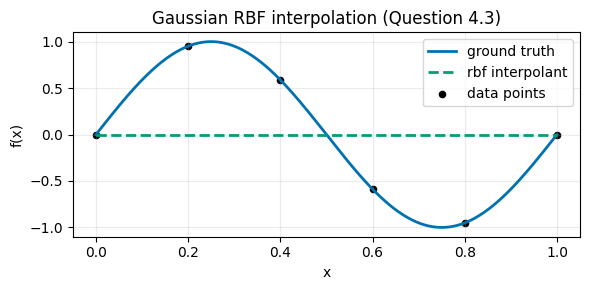

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

def fit_rbf(X, f, ell=0.2):
    """
    Fits a Radial Basis Function interpolant by solving the linear system Phi_XX * c = f
    
    Args:
        X: (d,n) array of training points
        f: (n,) array of function values at training points
        ell: bandwidth parameter for the Gaussian kernel
        
    Returns:
        coeffs: (n,) array of RBF coefficients
        R: Upper triangular Cholesky factor of Phi_XX
    """
    n = X.shape[1]
    coeffs = np.zeros(n)
    R =  np.zeros((n,n))
    # ADD YOUR CODE HERE
    return coeffs, R

def evaluate_rbf(X, coeffs, X_query, ell=0.2):
    """
    Evaluates the RBF interpolant at query points
    
    Args:
        X: (d,n) array of training points
        coeffs: (n,) array of RBF coefficients
        X_query: (d,m) array of query points
        ell: bandwidth parameter for the Gaussian kernel
        
    Returns:
        (m,) array of interpolated values at query points
    """
    n = X.shape[1]
    f_at_query = np.zeros(X_query.shape[1])
    return f_at_query

rng = np.random.default_rng(1)
X_train = np.linspace(0.0, 1.0, 6)[None, :]
f_train = np.sin(2 * np.pi * X_train)[0]
coeffs, R = fit_rbf(X_train, f_train, ell=0.18)
Phi_train = Phi_block(X_train, X_train, ell=0.18)
residual = np.linalg.norm(evaluate_rbf(X_train, coeffs, X_train, ell=0.18) - f_train) / np.linalg.norm(f_train)
print(f"relative training residual (Q4.3): {residual:.2e}")

x_dense = np.linspace(0.0, 1.0, 400)[None, :]
s_dense = evaluate_rbf(X_train, coeffs, x_dense, ell=0.18)
fig, ax = plt.subplots(figsize=(6.0, 3.0))
ax.plot(x_dense.ravel(), np.sin(2 * np.pi * x_dense).ravel(), label='ground truth', lw=2)
ax.plot(x_dense.ravel(), s_dense, label='rbf interpolant', lw=2, linestyle='--')
ax.scatter(X_train.ravel(), f_train, color='black', s=20, label='data points')
ax.set_title('Gaussian RBF interpolation (Question 4.3)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend(loc='upper right')
ax.grid(alpha=0.25)
fig.tight_layout()
plt.show()


## 4.4 
Now suppose we are given a batch of $p$ new points $\{ x^{\text{new}}_i, f(x^{\text{new}}_i)\}_{i=1}^p$ on top of the existing $n$ and we want to update our RBF interpolant to the $(n+p)$ points. Find and implement an algorithm that computes $c \in \mathbb{R}^{n + p}$, the new set of points $X \in \mathbb{R}^{d \times ( n + p)} $ and the Cholesky factor $R \in \mathbb{R}^{(n+p) \times (n+p)}$ of the updated RBF interpolant efficiently, from the Cholesky factorization of the original $n$ points.

Your algorithm should have complexity $\mathcal{O}(n^2p + p^3) $

relative coefficient error (Q4.4): 1.00e+00


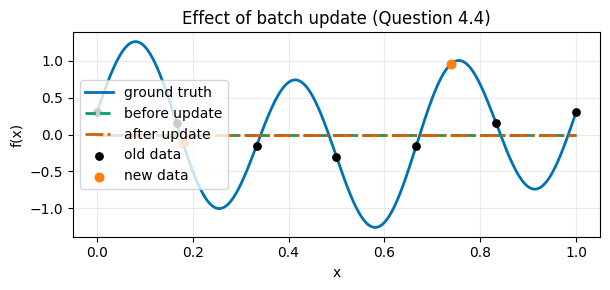

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


def update_rbf_interpolant(X_old, f_old, R_old, X_new, f_new, ell=0.2):
    """
    Updates an existing RBF interpolant with new data points efficiently.

    Args:
        X_old (ndarray): Matrix of existing points, shape (d, n)
        f_old (ndarray): Vector of existing function values, shape (n,)
        R_old (ndarray): Upper triangular Cholesky factor of existing RBF matrix
        X_new (ndarray): Matrix of new points to add, shape (d, p) 
        f_new (ndarray): Vector of new function values, shape (p,)
        ell (float): Length scale parameter for RBF kernel

    Returns:
        tuple:
            - coeffs_ext (ndarray): Updated RBF coefficients for all points
            - R_ext (ndarray): Updated Cholesky factor
            - X_ext (ndarray): Combined matrix of all points
    """
    # ADD YOUR CODE HERE
    n_old = X_old.shape[1]
    k_new = X_new.shape[1]
    coeffs_ext, R_ext, X_ext =  np.zeros(n_old + k_new), np.zeros((n_old + k_new, n_old + k_new)), np.zeros((d, n_old + k_new))
    return coeffs_ext, R_ext, X_ext



## The code below is provided for you. No need to change it.
ell = 0.2
rng = np.random.default_rng(4)
d, n_old, k_new = 2, 6, 3
X_old = rng.random((d, n_old))
X_new = rng.random((d, k_new))
ffun = lambda x: np.cos(2 * np.pi * x[0]) * np.sin(2 * np.pi * x[1])
f_old = ffun(X_old)
f_new = ffun(X_new)
R_old = np.linalg.cholesky(Phi_block(X_old, X_old, ell=ell)).T
coeffs_ext, R_ext, X_ext = update_rbf_interpolant(X_old, f_old, R_old, X_new, f_new, ell=ell)

# Estimate the naive way to do it
X_ext_2 = np.concatenate([X_old, X_new], axis=1)
Phi_full = Phi_block(X_ext_2, X_ext_2, ell=ell)
coeffs_ref = np.linalg.solve(Phi_full, np.concatenate([f_old, f_new]))
print(f"relative coefficient error (Q4.4): {np.linalg.norm(coeffs_ext - coeffs_ref) / np.linalg.norm(coeffs_ref):.2e}")

# A visualization of the update
x_plot = np.linspace(0.0, 1.0, 1000)[None, :]
fun1d = lambda x: np.sin(6 * np.pi * x[0]) + 0.3 * np.cos(2 * np.pi * x[0])
X_old_1d = np.linspace(0.0, 1.0, 7)[None, :]
X_new_1d = np.array([[0.18, 0.74]])
f_old_1d = fun1d(X_old_1d)
f_new_1d = fun1d(X_new_1d)
coeffs_old_1d, R_old_1d = fit_rbf(X_old_1d, f_old_1d, ell=ell)
coeffs_new_1d, R_new_1d, X_ext_1d = update_rbf_interpolant(X_old_1d, f_old_1d, R_old_1d, X_new_1d, f_new_1d, ell=ell)
interp_old = evaluate_rbf(X_old_1d, coeffs_old_1d, x_plot, ell=ell)
interp_new = evaluate_rbf(X_ext_1d, coeffs_new_1d, x_plot, ell=ell)

fig, ax = plt.subplots(figsize=(6.2, 3.0))
ax.plot(x_plot.ravel(), fun1d(x_plot), label='ground truth', lw=2)
ax.plot(x_plot.ravel(), interp_old, label='before update', linestyle='--', lw=2)
ax.plot(x_plot.ravel(), interp_new, label='after update', linestyle='-.', lw=2)
ax.scatter(X_old_1d.ravel(), f_old_1d, color='black', s=28, label='old data', zorder=3)
ax.scatter(X_new_1d.ravel(), f_new_1d, color='tab:orange', s=38, label='new data', zorder=3)
ax.set_title('Effect of batch update (Question 4.4)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend(loc='best')
ax.grid(alpha=0.25)
fig.tight_layout()
plt.show()


## 4.5: Corrupted data

Now suppose that after factorizing the matrix, we want to "forget" about one measurement (perhaps it is corrupted or we want to compute a cross-validation loss).  If the $k$-th measurement is missing, the interpolation conditions for the remaining points can be written in terms of a smaller system of equations where we remove row and column $k$ from the original problem. Alternatively it can be written as

$$
  f(x_i) = \sum_{j=1}^n \phi(\|x_i-x_j\|) \hat{c}_j + r_i, \quad r_i = 0 \text{ for } i \neq k \\
  \hat{c}_k = 0.
$$

Equivalently, we have

$$\begin{bmatrix}
  \Phi_{XX} & e_k \\
  e_k^T & 0
\end{bmatrix} 
\begin{bmatrix} \hat{c} \\ r_k \end{bmatrix}
=
\begin{bmatrix} \tilde{f}_X \\ 0 \end{bmatrix}$$

Using block elimination on the system above, complete the following routine to fill in a single missing value in an indicated location.  Your code should take $O(n^2)$ time (it would take $O(n^3)$ to refactor from scratch).


Relative error in repaired value: inf


/var/folders/0b/bgs7xkxj0cj4jc50c5v9hvwc0000gq/T/ipykernel_20504/370252130.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Relative error in repaired value: {np.linalg.norm(repaired_value - predicted_ref.item()) / np.linalg.norm(predicted_ref.item()):.6e}")


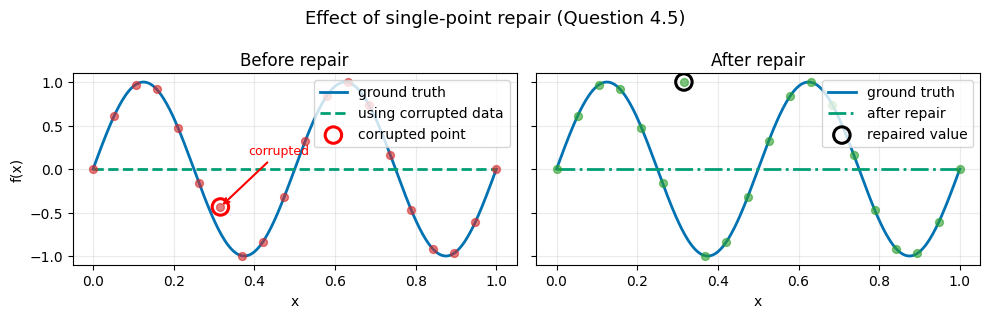

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cholesky
plt.style.use('seaborn-v0_8-colorblind')

def fill_single_missing_value(R, f_values, missing_index):
    """
    Assuming that entry missing_index of the measurement vector fX is missing,
    fill it with an approximate value from interpolating the remaining points
    using block elimination.
    
    Args:
        R: Upper triangular Cholesky factor of the RBF kernel matrix
        f_values: Array of function values, including corrupted value
        missing_index: Index of the corrupted/missing value to repair
        
    Returns:
        repaired_value: The repaired/interpolated value at the missing index
        coeffs: RBF coefficients with the missing point zeroed out
    """
    n = R.shape[0]
    repaired_value, coeffs = 1, np.zeros(n)
    return repaired_value, coeffs

## The code below is provided for you. No need to change it.

# Set random seed and generate test data
rng = np.random.default_rng(5)
d = 2
n = 45
X = rng.random((d, n))
true_fun = lambda x: np.exp(x[0]) * np.cos(3 * x[1])
f_full = true_fun(X)

# Test 2D case
Phi_full = Phi_block(X, X, ell=0.27)
R_full = cholesky(Phi_full, lower=False)
missing_index = 6

# Add corruption and repair
f_corrupted = f_full.copy()
f_corrupted[missing_index] += 0.25
repaired_value, coeffs_hat = fill_single_missing_value(R_full, f_corrupted, missing_index)

# Compare with reference solution
mask = np.ones(n, dtype=bool)
mask[missing_index] = False
Phi_reduced = Phi_full[np.ix_(mask, mask)]
f_reduced = f_full[mask]
coeffs_reduced = fit_rbf(X[:,mask], f_reduced, ell=0.27)[0]
predicted_ref = evaluate_rbf(X[:,mask], coeffs_reduced, X[:,[missing_index]], ell=0.27)
print(f"Relative error in repaired value: {np.linalg.norm(repaired_value - predicted_ref.item()) / np.linalg.norm(predicted_ref.item()):.6e}")

# Test 1D case for visualization
x_plot = np.linspace(0.0, 1.0, 400)[None, :]
true_fun_1d = lambda x: np.sin(4 * np.pi * x)
X_1d = np.linspace(0, 1, 20)[None, :]
f_true_1d = true_fun_1d(X_1d).ravel()

# Set up 1D problem
Phi_1d = Phi_block(X_1d, X_1d, ell=0.18)
R_1d = cholesky(Phi_1d, lower=False)
corrupt_idx = 6

# Add corruption and repair for 1D case
f_corrupted_1d = f_true_1d.copy()
f_corrupted_1d[corrupt_idx] += 0.3
coeffs_bad = fit_rbf(X_1d, f_corrupted_1d, ell=0.18)[0]
repaired_value_1d, coeffs_fixed = fill_single_missing_value(R_1d, f_corrupted_1d, corrupt_idx)

# Compute interpolations
interp_bad = evaluate_rbf(X_1d, coeffs_bad, x_plot, ell=0.18)
interp_fixed = evaluate_rbf(X_1d, coeffs_fixed, x_plot, ell=0.18)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(10.0, 3.2), sharey=True)

# Left plot - Before repair
axes[0].plot(x_plot.ravel(), true_fun_1d(x_plot).ravel(), label='ground truth', lw=2)
axes[0].plot(x_plot.ravel(), interp_bad, label='using corrupted data', linestyle='--', lw=2)
axes[0].scatter(X_1d.ravel(), f_corrupted_1d, color='tab:red', s=32, alpha=0.6, zorder=3)
axes[0].scatter(X_1d[0, corrupt_idx], f_corrupted_1d[corrupt_idx], 
                s=140, facecolors='none', edgecolors='red', linewidths=2.2, 
                label='corrupted point', zorder=4)
axes[0].annotate('corrupted', 
                xy=(X_1d[0, corrupt_idx], f_corrupted_1d[corrupt_idx]),
                xytext=(X_1d[0, corrupt_idx] + 0.07, f_corrupted_1d[corrupt_idx] + 0.6),
                arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
                color='red', fontsize=9)
axes[0].set_title('Before repair')
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].legend(loc='upper right')
axes[0].grid(alpha=0.25)

# Right plot - After repair
f_repaired = f_corrupted_1d.copy()
f_repaired[corrupt_idx] = repaired_value_1d
axes[1].plot(x_plot.ravel(), true_fun_1d(x_plot).ravel(), label='ground truth', lw=2)
axes[1].plot(x_plot.ravel(), interp_fixed, label='after repair', linestyle='-.', lw=2)
axes[1].scatter(X_1d.ravel(), f_repaired, color='tab:green', s=32, alpha=0.6, zorder=3)
axes[1].scatter(X_1d[0, corrupt_idx], repaired_value_1d,
                s=140, facecolors='none', edgecolors='black', linewidths=2.2,
                label='repaired value', zorder=4)
axes[1].set_title('After repair')
axes[1].set_xlabel('x')
axes[1].legend(loc='upper right')
axes[1].grid(alpha=0.25)

# Finalize plot
fig.suptitle('Effect of single-point repair (Question 4.5)', fontsize=13)
fig.tight_layout()
plt.show()


## 

# Extra credit

For those of you who can't get enough numerics, I will point to papers that are relevant to the class. If you implement the method and reproduce some of the findings in those paper and write a short report, you can get extra credit for the class. You can hand them in anytime before Dean's Date.

- We have covered one method in the class for low-rank approximation of a matrix: the SVD. While it's the optimal one, it is also prohibitive in many cases. A simple yet effective strategy for low-rank approximation for SPD matrices is pivoted Cholesky. This recent paper gives a nearly optimal pivoted Cholesky https://arxiv.org/abs/2207.06503
- Nested Dissection: A sparse Cholesky algorithm used to solve PDEs in 2D.
Alan George, *Nested Dissection of a Regular Finite Element Mesh*
 https://epubs.siam.org/doi/abs/10.1137/0710032?casa_token=MM0Bb6YPT8gAAAAA:TSRX-LKfLSXXVDMhqpsZcyRJ8j3TBTLjPhCnvC-j9sR-s1LqkwNOmV1VQiS2oeT808bdAa_3jAk


